# Examine IHT reconstruction results 

This notebook examines IHT's reconstruction result with and without debiasing. Overall, debiasing does not affect model selection nor parameter estimation. 

In [123]:
using DelimitedFiles
using Random
using DataFrames
using StatsBase
using Statistics
using Plots
using Plotly

┌ Info: Recompiling stale cache file /Users/biona001/.julia/compiled/v1.0/Plotly/M5iCk.ji for Plotly [58dd65bb-95f3-509e-9936-c39a10fdeae7]
└ @ Base loading.jl:1190


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6144522380113283792\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7929237561840189841\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/5ca3542fae68b88caa8c2d647d4f686b69ae116f-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-6144522380113283792\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

# Below are 100 simulations of y where X is 5k by 100k matrix

In [2]:
#debiasing simulation results
normal_5k_by_100k_100 = readdlm("repeats/Normal_100")
logistic_5k_by_100k_100 = readdlm("repeats/Bernoulli_100")
poisson_5k_by_100k_100 = readdlm("repeats/Poisson_100")
negativebinomial_5k_by_100k_100 = readdlm("repeats/NegativeBinomial_100")

#non-debiasing simulation results
# normal_5k_by_100k_100_nodebias = readdlm("repeats_nodebias/Normal_100")
# logistic_5k_by_100k_100_nodebias = readdlm("repeats_nodebias/Bernoulli_100")
# poisson_5k_by_100k_100_nodebias = [readdlm("repeats_nodebias/Poisson_50_1") readdlm("repeats_nodebias/Poisson_50_2")]
# negativebinomial_5k_by_100k_100_nodebias = readdlm("repeats_nodebias/NegativeBinomial_100")

#true model 
true_b = [0.25; 0.5; 0.1; 0.8]

4-element Array{Float64,1}:
 0.25
 0.5 
 0.1 
 0.8 

In [94]:
# normal_5k_by_100k_100
# logistic_5k_by_100k_100
# poisson_5k_by_100k_100
negativebinomial_5k_by_100k_100

4×100 Array{Float64,2}:
 0.254611  0.250135  0.254671  0.266255  …  0.232958  0.238956  0.222951
 0.488754  0.487867  0.495206  0.500307     0.504785  0.493355  0.512153
 0.075322  0.114788  0.100035  0.115531     0.120977  0.115165  0.107728
 0.798616  0.807674  0.803019  0.794494     0.812023  0.801608  0.796918

# Plots reconstruction results (debiasing)

In [103]:
normal = copy(normal_5k_by_100k_100)
logistic = copy(logistic_5k_by_100k_100)
poisson = copy(poisson_5k_by_100k_100)
negatibebinomial = copy(negativebinomial_5k_by_100k_100)

beta_10 = zeros(4, 100)
beta_25 = zeros(4, 100)
beta_50 = zeros(4, 100)
beta_80 = zeros(4, 100)

beta_10[1, :] .= negatibebinomial[3, :]
beta_10[2, :] .= poisson[3, :]
beta_10[3, :] .= logistic[3, :]
beta_10[4, :] .= normal[3, :]

beta_25[1, :] .= negatibebinomial[1, :]
beta_25[2, :] .= poisson[1, :]
beta_25[3, :] .= logistic[1, :]
beta_25[4, :] .= normal[1, :]

beta_50[1, :] .= negatibebinomial[2, :]
beta_50[2, :] .= poisson[2, :]
beta_50[3, :] .= logistic[2, :]
beta_50[4, :] .= normal[2, :]

beta_80[1, :] .= negatibebinomial[4, :]
beta_80[2, :] .= poisson[4, :]
beta_80[3, :] .= logistic[4, :]
beta_80[4, :] .= normal[4, :];

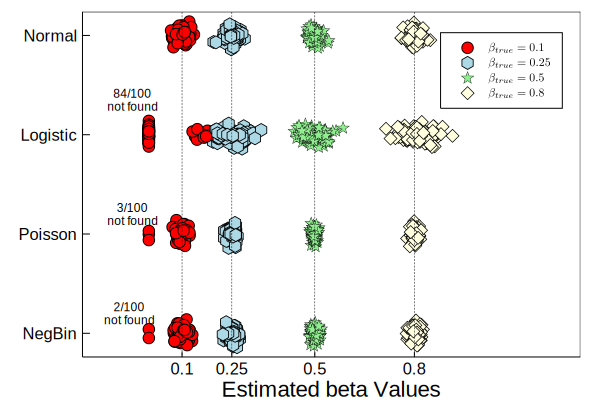

In [255]:
plt = scatter(beta_10[:, 1], collect(1:1:4), color=:red, xlabel = "Estimated beta Values",
    markersize=6, legendfontsize=8, guidefontsize=15, grid=false, framestyle=:box,
    xlim=(-0.2, 1.3), label=L"\mathbf{\beta}_{true} = 0.1")
scatter!(beta_25[:, 1], collect(1:1:4), markershape=:hex, color=:lightblue, markersize=6, label=L"\mathbf{\beta}_{true} = 0.25")
scatter!(beta_50[:, 1], collect(1:1:4), markershape=:star5, color=:lightgreen, markersize=6, label=L"\mathbf{\beta}_{true} = 0.5")
scatter!(beta_80[:, 1], collect(1:1:4), markershape=:diamond, color=:lightyellow, markersize=6, label=L"\mathbf{\beta}_{true} = 0.8")

yticks!([1:1:4;], ["NegBin", "Poisson", "Logistic", "Normal"], tickfontsize=15)
xticks!([0.1, 0.25, 0.5, 0.8], ["0.1", "0.25", "0.5", "0.8"], tickfontsize=11)

Random.seed!(111)
for i in 2:100
    scatter!(beta_10[:, i], 0.05*randn() .+ collect(1:1:4), markershape=:circle, color=:red, markersize=6, label = "")
    scatter!(beta_25[:, i], 0.05*randn() .+ collect(1:1:4), markershape=:hex, color=:lightblue, markersize=6, label = "")
    scatter!(beta_50[:, i], 0.05*randn() .+ collect(1:1:4), markershape=:star5, color=:lightgreen, markersize=6, label = "")
    scatter!(beta_80[:, i], 0.05*randn() .+ collect(1:1:4), markershape=:diamond, color=:lightyellow, markersize=6, label = "")
end
vline!([0.1,0.25,0.5,0.8], linestyle=:dash, linecolor=:black, linewidth=0.5, label = "")
annotate!([(-0.05, 3.35, text("84/100\n not found", 8, :topleft)), 
           (-0.05, 2.2, text("3/100\n not found", 8, :topleft)),
           (-0.06, 1.2, text("2/100\n not found", 8, :topleft))])
plt

In [254]:
Plots.savefig(plt, "repeats.png")

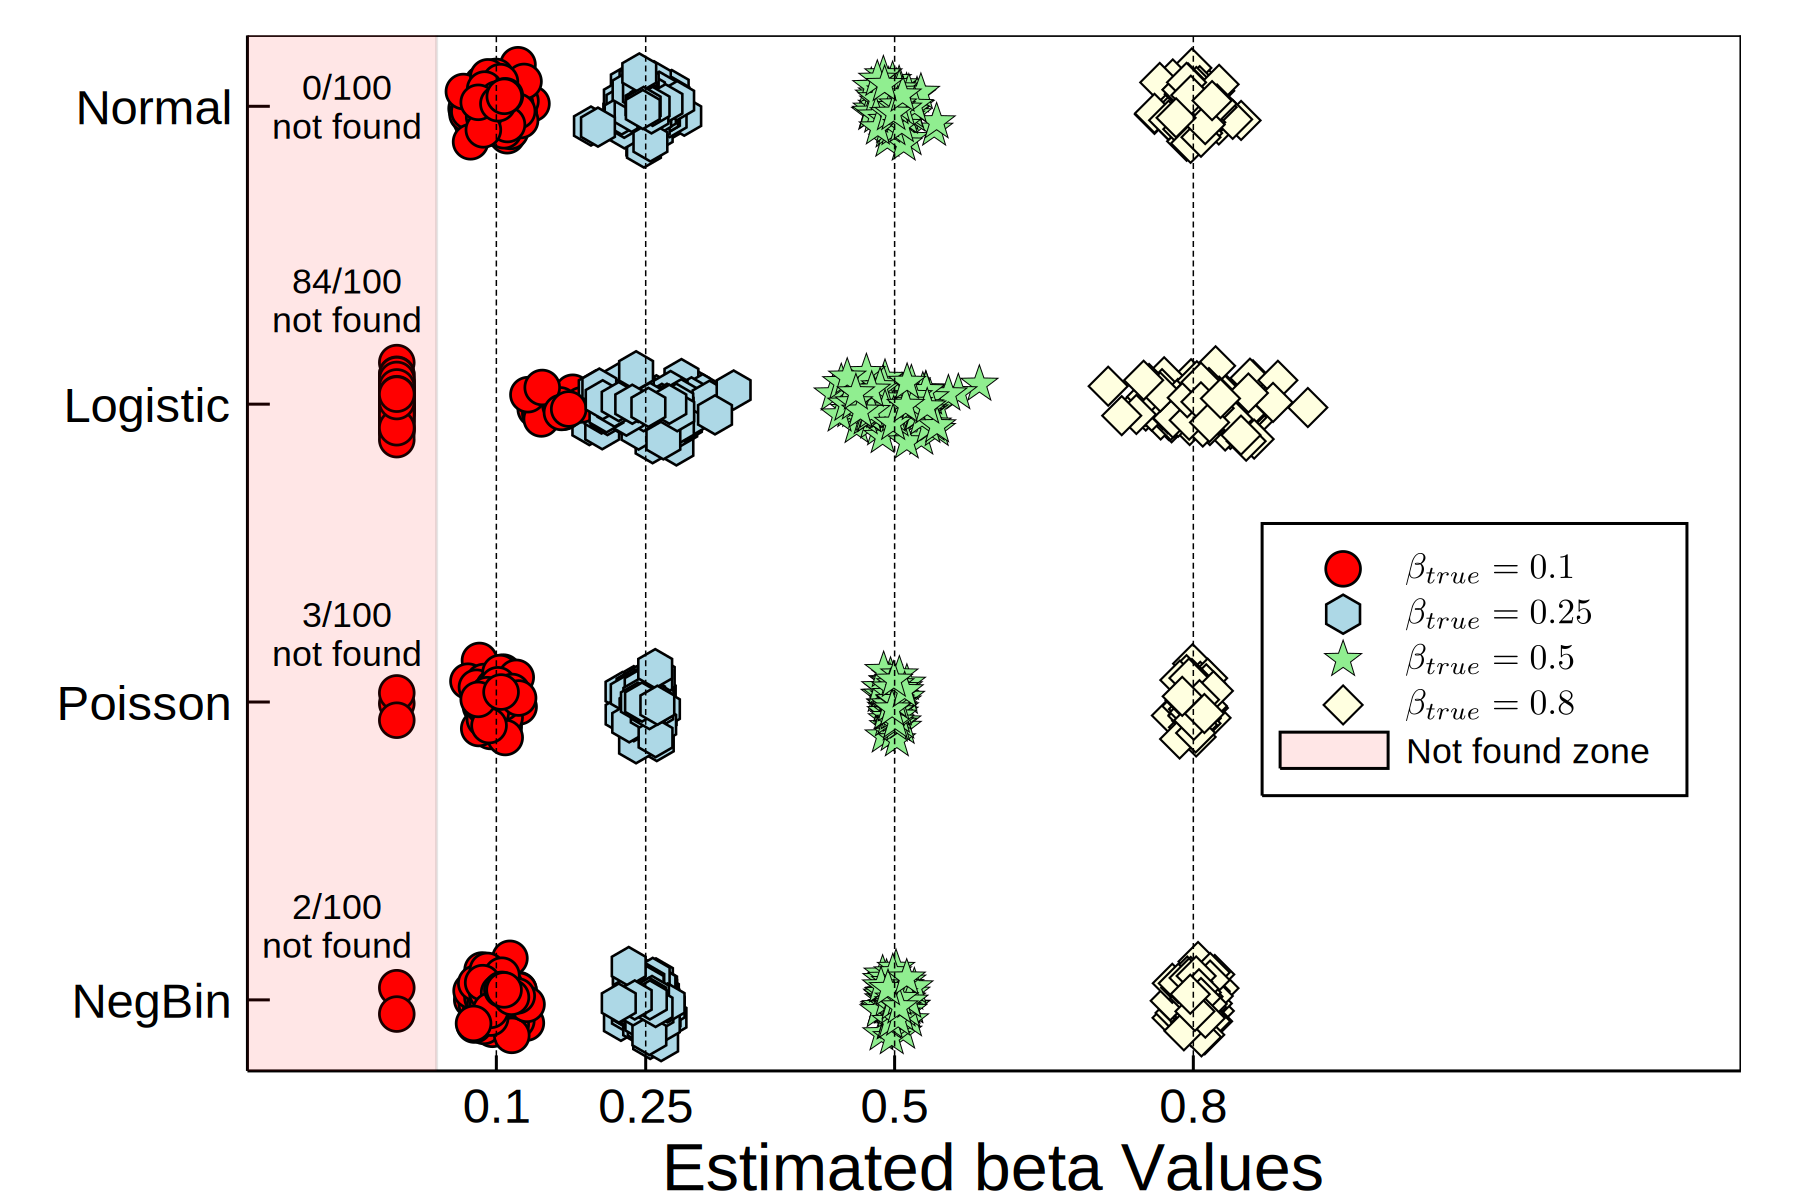

In [285]:
plt = scatter(beta_10[:, 1], collect(1:1:4), color=:red, xlabel = "Estimated beta Values",
    markersize=6, legendfontsize=8, guidefontsize=15, grid=false, framestyle=:box,
    xlim=(-0.15, 1.35), label=L"\mathbf{\beta}_{true} = 0.1", legend=:right, dpi=300)
scatter!(beta_25[:, 1], collect(1:1:4), markershape=:hex, color=:lightblue, markersize=6, label=L"\mathbf{\beta}_{true} = 0.25")
scatter!(beta_50[:, 1], collect(1:1:4), markershape=:star5, color=:lightgreen, markersize=6, label=L"\mathbf{\beta}_{true} = 0.5")
scatter!(beta_80[:, 1], collect(1:1:4), markershape=:diamond, color=:lightyellow, markersize=6, label=L"\mathbf{\beta}_{true} = 0.8")

yticks!([1:1:4;], ["NegBin", "Poisson", "Logistic", "Normal"], tickfontsize=15)
xticks!([0.1, 0.25, 0.5, 0.8], ["0.1", "0.25", "0.5", "0.8"], tickfontsize=11)

Random.seed!(111)
for i in 2:100
    scatter!(beta_10[:, i], 0.05*randn() .+ collect(1:1:4), markershape=:circle, color=:red, markersize=6, label = "")
    scatter!(beta_25[:, i], 0.05*randn() .+ collect(1:1:4), markershape=:hex, color=:lightblue, markersize=6, label = "")
    scatter!(beta_50[:, i], 0.05*randn() .+ collect(1:1:4), markershape=:star5, color=:lightgreen, markersize=6, label = "")
    scatter!(beta_80[:, i], 0.05*randn() .+ collect(1:1:4), markershape=:diamond, color=:lightyellow, markersize=6, label = "")
end
vline!([0.1,0.25,0.5,0.8], linestyle=:dash, linecolor=:black, linewidth=0.5, label = "")
annotate!([(-0.05, 4.0, text("0/100\n not found", 8, :topleft)),
           (-0.05, 3.35, text("84/100\n not found", 8, :topleft)), 
           (-0.05, 2.23, text("3/100\n not found", 8, :topleft)),
           (-0.06, 1.25, text("2/100\n not found", 8, :topleft))])
vspan!(plt,[-Inf,0.04], color = :red, alpha = 0.1, labels = "Not found zone");
plt

In [286]:
Plots.savefig(plt, "repeats.png")

### First compute the probability that reach predictor is found

In [81]:
k = size(true_b, 1)
normal_found   = zeros(k)
logistic_found = zeros(k)
poisson_found  = zeros(k)
negativebinomial_found = zeros(k)

# normal_found_nodebias   = zeros(k)
# logistic_found_nodebias = zeros(k)
# poisson_found_nodebias  = zeros(k)
# negativebinomial_found_nodebias = zeros(k)

for i in 1:k
    normal_found[i]   = sum(normal_5k_by_100k_100[i, :] .!= 0)
    logistic_found[i] = sum(logistic_5k_by_100k_100[i, :] .!= 0)
    poisson_found[i]  = sum(poisson_5k_by_100k_100[i, :] .!= 0)
    negativebinomial_found[i] = sum(negativebinomial_5k_by_100k_100[i, :] .!= 0)
    
#     normal_found_nodebias[i]   = sum(normal_5k_by_100k_100_nodebias[i, :] .!= 0)
#     logistic_found_nodebias[i] = sum(logistic_5k_by_100k_100_nodebias[i, :] .!= 0)
#     poisson_found_nodebias[i]  = sum(poisson_5k_by_100k_100_nodebias[i, :] .!= 0)
#     negativebinomial_found_nodebias[i] = sum(negativebinomial_5k_by_100k_100_nodebias[i, :] .!= 0)    
end

In [243]:
negativebinomial_found

4-element Array{Float64,1}:
 100.0
 100.0
  98.0
 100.0

# Found probability (debiasing)

In [5]:
find_probability = DataFrame(
    true_b = true_b[:],
    normal_prob_find = normal_found, 
    logistic_prob_find = logistic_found,
    poisson_prob_find  = poisson_found,
    negativebinomial_prob_find = negativebinomial_found)
#sort!(find_probability, rev=true) #sort later

,true_b,normal_prob_find,logistic_prob_find,poisson_prob_find,negativebinomial_prob_find
,Float64,Float64,Float64,Float64,Float64
1,0.25,100.0,100.0,100.0,100.0
2,0.5,100.0,100.0,100.0,100.0
3,0.1,100.0,16.0,97.0,98.0
4,0.8,100.0,100.0,100.0,100.0


# Found probability (no debiasing)

In [9]:
find_probability_nodebias = DataFrame(
    true_b = true_b[:],
    normal_prob_find_nodebias = normal_found_nodebias, 
    logistic_prob_find_nodebias = logistic_found_nodebias,
    poisson_prob_find_nodebias  = poisson_found_nodebias,
    negativebinomial_prob_find_nodebias = negativebinomial_found_nodebias)
#sort!(find_probability, rev=true) #sort later

,true_b,normal_prob_find_nodebias,logistic_prob_find_nodebias,poisson_prob_find_nodebias,negativebinomial_prob_find_nodebias
,Float64,Float64,Float64,Float64,Float64
1,0.25,100.0,100.0,100.0,69.0
2,0.5,100.0,100.0,100.0,100.0
3,0.1,100.0,7.0,100.0,0.0
4,0.8,100.0,100.0,100.0,100.0


# Mean and standard deviation (debiasing)

In [6]:
k = size(true_b, 1)
normal_mean   = zeros(k)
normal_std    = zeros(k)
logistic_mean = zeros(k)
logistic_std  = zeros(k)
poisson_mean  = zeros(k)
poisson_std   = zeros(k)
negativebinomial_mean = zeros(k)
negativebinomial_std  = zeros(k)

for i in 1:k
    #compute mean and std if at least 1 found
    if normal_found[i] != 0
        normal_cur_row = normal_5k_by_100k_100[i, :] .!= 0
        normal_mean[i] = mean(normal_5k_by_100k_100[i, :][normal_cur_row])
        normal_std[i]  = std(normal_5k_by_100k_100[i, :][normal_cur_row])
    end
    
    if logistic_found[i] != 0
        logistic_cur_row = logistic_5k_by_100k_100[i, :] .!= 0
        logistic_mean[i] = mean(logistic_5k_by_100k_100[i, :][logistic_cur_row])
        logistic_std[i]  = std(logistic_5k_by_100k_100[i, :][logistic_cur_row])
    end
    
    if poisson_found[i] != 0
        poisson_cur_row = poisson_5k_by_100k_100[i, :] .!= 0
        poisson_mean[i] = mean(poisson_5k_by_100k_100[i, :][poisson_cur_row])
        poisson_std[i]  = std(poisson_5k_by_100k_100[i, :][poisson_cur_row])
    end
    
    if negativebinomial_found[i] != 0
        negativebinomial_cur_row = negativebinomial_5k_by_100k_100[i, :] .!= 0
        negativebinomial_mean[i] = mean(negativebinomial_5k_by_100k_100[i, :][negativebinomial_cur_row])
        negativebinomial_std[i]  = std(negativebinomial_5k_by_100k_100[i, :][negativebinomial_cur_row])
    end
end

In [7]:
found_mean_and_std = DataFrame(
    true_b = true_b,
    normal_mean = normal_mean, 
    normal_std = normal_std,
    logistic_mean = logistic_mean,
    logistic_std = logistic_std,
    poisson_mean = poisson_mean,
    poisson_std = poisson_std,
    negativebinomial_mean = negativebinomial_mean,
    negativebinomial_std = negativebinomial_std)
# sort!(found_mean_and_std, rev=true) #sort later

,true_b,normal_mean,normal_std,logistic_mean,logistic_std,poisson_mean,poisson_std,negativebinomial_mean,negativebinomial_std
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.25,0.249992,0.015539,0.252406,0.0324372,0.250385,0.00875178,0.249882,0.0111929
2,0.5,0.500658,0.012804,0.49942,0.0295852,0.498948,0.00556042,0.499853,0.00872991
3,0.1,0.099854,0.014814,0.157379,0.0151122,0.0995426,0.00957257,0.10154,0.0121407
4,0.8,0.80075,0.0152157,0.804983,0.0366237,0.801223,0.00692837,0.801706,0.0102275


# Mean and standard deviation (non-debiasing) 

In [12]:
k = size(true_b, 1)
normal_mean_nodebias   = zeros(k)
normal_std_nodebias    = zeros(k)
logistic_mean_nodebias = zeros(k)
logistic_std_nodebias  = zeros(k)
poisson_mean_nodebias  = zeros(k)
poisson_std_nodebias   = zeros(k)
negativebinomial_mean_nodebias = zeros(k)
negativebinomial_std_nodebias  = zeros(k)

for i in 1:k
    #compute mean and std if at least 1 found
    if normal_found_nodebias[i] != 0
        normal_cur_row = normal_5k_by_100k_100_nodebias[i, :] .!= 0
        normal_mean_nodebias[i] = mean(normal_5k_by_100k_100_nodebias[i, :][normal_cur_row])
        normal_std_nodebias[i]  = std(normal_5k_by_100k_100_nodebias[i, :][normal_cur_row])
    end
    
    if logistic_found_nodebias[i] != 0
        logistic_cur_row = logistic_5k_by_100k_100_nodebias[i, :] .!= 0
        logistic_mean_nodebias[i] = mean(logistic_5k_by_100k_100_nodebias[i, :][logistic_cur_row])
        logistic_std_nodebias[i]  = std(logistic_5k_by_100k_100_nodebias[i, :][logistic_cur_row])
    end
    
    if poisson_found_nodebias[i] != 0
        poisson_cur_row = poisson_5k_by_100k_100_nodebias[i, :] .!= 0
        poisson_mean_nodebias[i] = mean(poisson_5k_by_100k_100_nodebias[i, :][poisson_cur_row])
        poisson_std_nodebias[i]  = std(poisson_5k_by_100k_100_nodebias[i, :][poisson_cur_row])
    end
    
    if negativebinomial_found_nodebias[i] != 0
        negativebinomial_cur_row = negativebinomial_5k_by_100k_100_nodebias[i, :] .!= 0
        negativebinomial_mean_nodebias[i] = mean(negativebinomial_5k_by_100k_100_nodebias[i, :][negativebinomial_cur_row])
        negativebinomial_std_nodebias[i]  = std(negativebinomial_5k_by_100k_100_nodebias[i, :][negativebinomial_cur_row])
    end
end

In [13]:
found_mean_and_std_nodebias = DataFrame(
    true_b = true_b[:],
    normal_mean_nodebias = normal_mean_nodebias, 
    normal_std_nodebias = normal_std_nodebias,
    logistic_mean_nodebias = logistic_mean_nodebias,
    logistic_std_nodebias = logistic_std_nodebias,
    poisson_mean_nodebias = poisson_mean_nodebias,
    poisson_std_nodebias = poisson_std_nodebias,
    negativebinomial_mean_nodebias = negativebinomial_mean_nodebias,
    negativebinomial_std_nodebias = negativebinomial_std_nodebias)
# sort!(found_mean_and_std_nodebias, rev=true) #sort later

,true_b,normal_mean_nodebias,normal_std_nodebias,logistic_mean_nodebias,logistic_std_nodebias,poisson_mean_nodebias,poisson_std_nodebias,negativebinomial_mean_nodebias,negativebinomial_std_nodebias
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.25,0.248782,0.0126425,0.254429,0.0304876,0.24819,0.00684828,0.347684,0.0192545
2,0.5,0.502616,0.0119811,0.499046,0.0354224,0.499912,0.00594064,0.884658,0.0387502
3,0.1,0.0991987,0.0140408,0.150433,0.00857745,0.0998994,0.00864056,0.0,0.0
4,0.8,0.798988,0.0131306,0.802978,0.0351538,0.799929,0.00595888,1.09068,0.0305499


# Sort and round results (debiasing)

In [8]:
sort!(found_mean_and_std, rev=true)
for i in 1:size(found_mean_and_std, 2)
    found_mean_and_std[:, i] = round.(found_mean_and_std[:, i], digits=3)
end
found_mean_and_std

,true_b,normal_mean,normal_std,logistic_mean,logistic_std,poisson_mean,poisson_std,negativebinomial_mean,negativebinomial_std
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.8,0.801,0.015,0.805,0.037,0.801,0.007,0.802,0.01
2,0.5,0.501,0.013,0.499,0.03,0.499,0.006,0.5,0.009
3,0.25,0.25,0.016,0.252,0.032,0.25,0.009,0.25,0.011
4,0.1,0.1,0.015,0.157,0.015,0.1,0.01,0.102,0.012


# Sort and round results (non-debiasing)

In [16]:
sort!(found_mean_and_std_nodebias, rev=true)
for i in 1:size(found_mean_and_std_nodebias, 2)
    found_mean_and_std_nodebias[:, i] = round.(found_mean_and_std_nodebias[:, i], digits=3)
end
found_mean_and_std_nodebias

,true_b,normal_mean_nodebias,normal_std_nodebias,logistic_mean_nodebias,logistic_std_nodebias,poisson_mean_nodebias,poisson_std_nodebias,negativebinomial_mean_nodebias,negativebinomial_std_nodebias
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.8,0.799,0.013,0.803,0.035,0.8,0.006,1.091,0.031
2,0.5,0.503,0.012,0.499,0.035,0.5,0.006,0.885,0.039
3,0.25,0.249,0.013,0.254,0.03,0.248,0.007,0.348,0.019
4,0.1,0.099,0.014,0.15,0.009,0.1,0.009,0.0,0.0
